# Here we predict the Death Rate of Covid19

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [149]:
ds=pd.read_csv('Covid19_Datasets.csv')
df=pd.read_csv('Covid19_PopulationAgePercentage.csv')

In [150]:
ds

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [151]:
df

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.1890,0.6570,0.1540
1,Russia,0.1760,0.6820,0.1420
2,Spain,0.1470,0.6590,0.1940
3,Brazil,0.2170,0.6970,0.0860
4,UK,0.1770,0.6380,0.1850
5,Italy,0.1350,0.6350,0.2300
6,France,0.1810,0.6220,0.1970
7,Germany,0.1310,0.6550,0.2150
8,Turkey,0.2500,0.6690,0.0820
9,Iran,0.2370,0.7090,0.0540


In [152]:
DS = pd.merge(ds, df, on='Country')
DS

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6599,2020-05-15,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6600,2020-05-16,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN
6601,2020-05-17,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN


In [153]:
DS.shape

(6603, 12)

Observation:
    
    There are 6603 rows and 12 columns present in our dataset.

In [154]:
DS.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases', 'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years'],
      dtype='object')

In [155]:
DS.dtypes

Date                         object
Country                      object
Population                    int64
Total Tests                 float64
Total Cases                 float64
Total Deaths                float64
Total Recovered             float64
Serious or Critical         float64
Active Cases                float64
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

Observation:
    
    1. There are only two type of data present in our dataset object type and numeric type.
    
    2. Data and Country are object type and rest other columns are numeric type.

In [156]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603 entries, 0 to 6602
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6603 non-null   object 
 1   Country                   6603 non-null   object 
 2   Population                6603 non-null   int64  
 3   Total Tests               5505 non-null   float64
 4   Total Cases               6554 non-null   float64
 5   Total Deaths              5367 non-null   float64
 6   Total Recovered           6318 non-null   float64
 7   Serious or Critical       4117 non-null   float64
 8   Active Cases              6544 non-null   float64
 9   Fraction age 0-14 years   5456 non-null   float64
 10  Fraction age 15-64 years  5456 non-null   float64
 11  Fraction age 65+ years    5456 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 670.6+ KB


Observation:
    
    Information of the dataset shows that there are missing values present.

# To check the Missing Values

In [157]:
DS.isnull().values.any()

True

In [158]:
DS.isnull().sum()

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

Observation:
    
    1. There are 1098 missing values in Total Tests.
    
    2. 49 missing values in Total Cases.
    
    3. 1236 missing values in Total Deaths.
    
    4. 285 missing values in Total Recovered.
    
    5. 2486 missing values in Serious or Critical.
    
    6. 59 missing values in Active Cases.
    
    7. 1147 missing values in each Fraction age 0-14 years, Fraction age 15-64 years, Fraction age 65+ years.

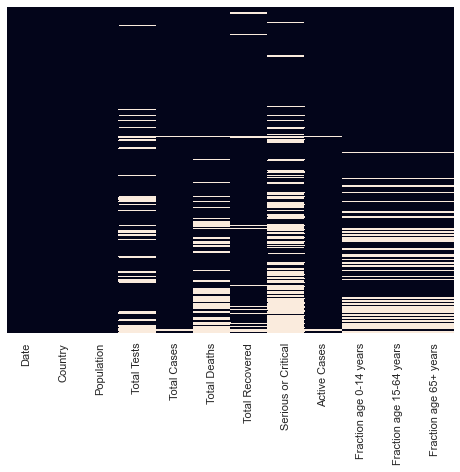

In [159]:
plt.figure(figsize=(8,6))
sns.heatmap(DS.isnull(),yticklabels=False,cbar=False)

Checking out missing values via visualization with the help of heatmap.

# Imputing missing values in Numeric Columns

In [160]:
#Imputing the missing values with their median

DS['Total Tests'].fillna(DS['Total Tests'].median(),inplace=True)
DS['Total Cases'].fillna(DS['Total Cases'].median(),inplace=True)
DS['Total Deaths'].fillna(DS['Total Deaths'].median(),inplace=True)
DS['Total Recovered'].fillna(DS['Total Recovered'].median(),inplace=True)
DS['Serious or Critical'].fillna(DS['Serious or Critical'].median(),inplace=True)
DS['Active Cases'].fillna(DS['Active Cases'].median(),inplace=True)
DS['Fraction age 0-14 years'].fillna(DS['Fraction age 0-14 years'].median(),inplace=True)
DS['Fraction age 15-64 years'].fillna(DS['Fraction age 15-64 years'].median(),inplace=True)
DS['Fraction age 65+ years'].fillna(DS['Fraction age 65+ years'].median(),inplace=True)

In [161]:
DS.isnull().sum()

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

Observation:
    
    Now there are no missing values present in our dataset. We can aslo see it via visualization.

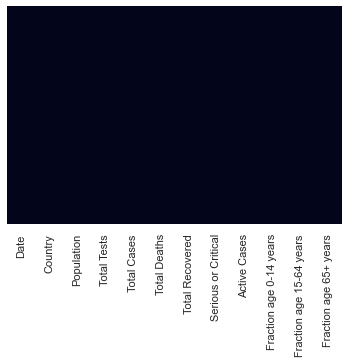

In [162]:
sns.heatmap(DS.isnull(),yticklabels=False,cbar=False)

# Exploring categorical columns

In [163]:
for column in ds.columns:
    if DS[column].dtypes == object:
        print(str(column) + ' : ' + str(DS[column].unique()))
        print(DS[column].value_counts())
        print('*******************************************************************************************************')
        print('\n')

Date : ['2020-04-18' '2020-04-19' '2020-04-20' '2020-04-21' '2020-04-22'
 '2020-04-23' '2020-04-24' '2020-04-25' '2020-04-26' '2020-04-27'
 '2020-04-28' '2020-04-29' '2020-04-30' '2020-05-01' '2020-05-02'
 '2020-05-03' '2020-05-04' '2020-05-05' '2020-05-06' '2020-05-07'
 '2020-05-08' '2020-05-09' '2020-05-10' '2020-05-11' '2020-05-12'
 '2020-05-13' '2020-05-14' '2020-05-15' '2020-05-16' '2020-05-17'
 '2020-05-18']
2020-05-03    213
2020-04-24    213
2020-05-08    213
2020-04-30    213
2020-05-18    213
2020-05-06    213
2020-05-16    213
2020-04-20    213
2020-04-29    213
2020-05-12    213
2020-05-07    213
2020-05-10    213
2020-04-21    213
2020-04-28    213
2020-04-18    213
2020-04-19    213
2020-05-11    213
2020-04-27    213
2020-04-22    213
2020-05-15    213
2020-04-26    213
2020-04-23    213
2020-05-05    213
2020-04-25    213
2020-05-04    213
2020-05-17    213
2020-05-01    213
2020-05-02    213
2020-05-14    213
2020-05-09    213
2020-05-13    213
Name: Date, dtype: int64

Observation:
    
    1. There are two categorical columns present in our dataset Date and Country.
    
    2. Each unique date is present 213 times in our dataset.
    
    3. Each unique country is present 31 times in our dataset.

# Feature Extraction

In [164]:
#Here we create our target variable Death Rate from Total Tests and Total Deaths column
DS["Death Rate"] = DS['Total Deaths'] / DS['Total Tests'] *100

In [165]:
DS

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death Rate
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.1890,0.657,0.1540,1.048159
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.1890,0.657,0.1540,1.050174
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.1890,0.657,0.1540,1.055892
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.1890,0.657,0.1540,1.082249
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.1890,0.657,0.1540,1.101855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199
6599,2020-05-15,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199
6600,2020-05-16,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199
6601,2020-05-17,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199


In [166]:
#We create a column Per Capita Penetraion from the column Population and Total Cases
DS["Per Capita Penetration"] = DS['Total Cases'] / DS['Population'] *100

In [167]:
DS

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death Rate,Per Capita Penetration
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.1890,0.657,0.1540,1.048159,0.223352
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.1890,0.657,0.1540,1.050174,0.230922
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.1890,0.657,0.1540,1.055892,0.239667
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.1890,0.657,0.1540,1.082249,0.247523
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.1890,0.657,0.1540,1.101855,0.256585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250
6599,2020-05-15,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250
6600,2020-05-16,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250
6601,2020-05-17,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250


In [168]:
#Creating a column Day from column Date
DS['Day']=pd.to_datetime(DS['Date'],format='%Y/%m/%d').dt.day

In [169]:
#Creating a column Month from column Date
DS['Month']=pd.to_datetime(DS['Date'],format='%Y/%m/%d').dt.month

In [170]:
DS

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death Rate,Per Capita Penetration,Day,Month
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.1890,0.657,0.1540,1.048159,0.223352,18,4
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.1890,0.657,0.1540,1.050174,0.230922,19,4
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.1890,0.657,0.1540,1.055892,0.239667,20,4
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.1890,0.657,0.1540,1.082249,0.247523,21,4
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.1890,0.657,0.1540,1.101855,0.256585,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-14,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250,14,5
6599,2020-05-15,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250,15,5
6600,2020-05-16,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250,16,5
6601,2020-05-17,Saint Pierre Miquelon,5797,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250,17,5


We dont create a Year column as there is only 1 unique year present.

# Dropping the unnecessary columns

In [171]:
DS.drop(['Date','Population'],axis=1,inplace=True)

In [172]:
DS

,Country,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death Rate,Per Capita Penetration,Day,Month
0,USA,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.1890,0.657,0.1540,1.048159,0.223352,18,4
1,USA,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.1890,0.657,0.1540,1.050174,0.230922,19,4
2,USA,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.1890,0.657,0.1540,1.055892,0.239667,20,4
3,USA,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.1890,0.657,0.1540,1.082249,0.247523,21,4
4,USA,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.1890,0.657,0.1540,1.101855,0.256585,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,Saint Pierre Miquelon,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250,14,5
6599,Saint Pierre Miquelon,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250,15,5
6600,Saint Pierre Miquelon,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250,16,5
6601,Saint Pierre Miquelon,25478.0,1.0,24.0,1.0,13.0,0.0,0.2665,0.649,0.0635,0.094199,0.017250,17,5


# Summary Statistics

In [173]:
DS.describe()

,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death Rate,Per Capita Penetration,Day,Month
count,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03,6603.000000,6603.000000,6603.000000,6603.000000,6603.000000,6603.000000,6603.000000
mean,1.849230e+05,1.680860e+04,1155.639709,5612.143723,246.033773,9.877540e+03,0.274431,0.638348,0.083522,1.306548,0.089813,15.580645,4.580645
std,6.971325e+05,8.829631e+04,6015.559135,22984.083710,1321.936609,6.512371e+04,0.096834,0.060518,0.057415,7.195617,0.195251,8.526788,0.493491
min,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.115000,0.472000,0.011000,0.000000,0.000003,1.000000,4.000000
25%,4.733000e+03,8.000000e+01,8.000000,29.000000,7.000000,2.700000e+01,0.191000,0.607000,0.038000,0.048982,0.003636,8.000000,4.000000
50%,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02,0.266500,0.649000,0.063500,0.162348,0.018666,16.000000,5.000000
75%,1.019110e+05,4.757000e+03,109.000000,1302.500000,27.000000,1.991000e+03,0.335000,0.667000,0.114000,0.607634,0.093709,23.000000,5.000000
max,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,0.502000,0.850000,0.270000,240.000000,1.927896,30.000000,5.000000


Observation:
    
    1. Maximum number of Total Deaths in a country is 91981 and the minimum is 0.
    
    2. Maximum number of Total Recovered is 356383 and minimum is 1.
    
    3. Maximum Per Capita Penetrtion of a Country is 1.927896 and the minimum is 0.000003.
    
    4. Maxium Standard Deviation of 6015.559135 is in Total Deaths column.
    
    5. In Total Deaths, Total Recovered, Serious or Critical, Active Cases, Death Rate, Per Capita Penetration Columns Mean is greater than Median so the columns are Positively Skewed.
    
    6. In Day and Month column Median is greater than Mean so the columns are negatively skewed.

# To check the Correlation

In [174]:
DS_cor= DS.corr()
DS_cor

,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death Rate,Per Capita Penetration,Day,Month
Total Tests,1.000000,0.898828,0.812510,0.795733,0.745569,0.855645,-2.234133e-01,1.212665e-01,2.657171e-01,-0.025131,0.162755,-3.590409e-02,7.090206e-02
Total Cases,0.898828,1.000000,0.935240,0.819069,0.892219,0.975026,-1.671429e-01,7.005171e-02,2.205476e-01,0.003993,0.173537,-1.742574e-02,3.455919e-02
Total Deaths,0.812510,0.935240,1.000000,0.796069,0.833228,0.881907,-1.863823e-01,4.323638e-02,2.811301e-01,0.013292,0.207148,-1.721540e-02,3.266208e-02
Total Recovered,0.795733,0.819069,0.796069,1.000000,0.723215,0.685226,-2.231024e-01,1.113141e-01,2.751780e-01,0.026321,0.195489,-3.315662e-02,6.773818e-02
Serious or Critical,0.745569,0.892219,0.833228,0.723215,1.000000,0.875899,-1.553174e-01,7.698608e-02,1.926070e-01,0.002582,0.141438,1.099163e-02,-1.604876e-02
Active Cases,0.855645,0.975026,0.881907,0.685226,0.875899,1.000000,-1.278152e-01,5.168833e-02,1.709629e-01,-0.005018,0.143614,-1.076154e-02,1.765699e-02
Fraction age 0-14 years,-0.223413,-0.167143,-0.186382,-0.223102,-0.155317,-0.127815,1.000000e+00,-8.389622e-01,-7.980721e-01,-0.012344,-0.255012,-4.303106e-18,1.603374e-17
Fraction age 15-64 years,0.121267,0.070052,0.043236,0.111314,0.076986,0.051688,-8.389622e-01,1.000000e+00,3.504390e-01,0.022827,0.200641,3.886211e-18,-7.188139e-18
Fraction age 65+ years,0.265717,0.220548,0.281130,0.275178,0.192607,0.170963,-7.980721e-01,3.504390e-01,1.000000e+00,-0.028625,0.177999,-8.896659e-18,1.682251e-17
Death Rate,-0.025131,0.003993,0.013292,0.026321,0.002582,-0.005018,-1.234389e-02,2.282733e-02,-2.862505e-02,1.000000,-0.008583,5.548508e-02,-7.594566e-02


For better understanding we will see it via visualization with the help of heatmap.

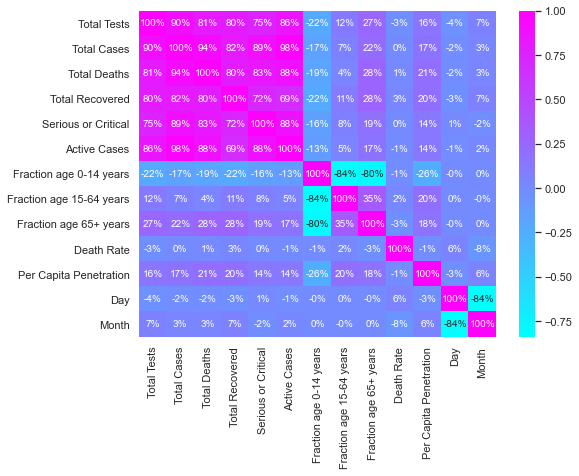

In [175]:
plt.figure(figsize=(8,6))
sns.heatmap(DS_cor,annot=True,fmt='.0%',cmap='cool')
plt.show()

Observation:
    
    1. Total Tests, Total Cases,Total Deaths, Total Recovered, Serious or Critical, Active Cases are highly positively correlated with each other.
    
    2. Day and Month are highly negatively correlated.
    
    3. Fraction age 0-14 years, Fraction age 15-64 years, Fraction age 65+ years are highly negatively correlated with each other.

Text(0.5, 1.0, 'correaltion with target variable Death Rate')

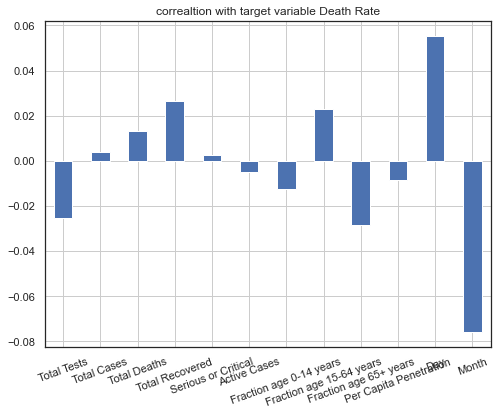

In [176]:
#checking the correlation with target variable 'Death Rate'

plt.figure(figsize=(8,6))
DS.drop('Death Rate', axis=1).corrwith(DS['Death Rate']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correaltion with target variable Death Rate")

Observation:
    
    1. Per Capita Penetration is highly positively correlated with Death Rate.
    
    2. Month and Fraction age 15-64 years is highly negatively correlated with Death Rate means as the months passing and the people with age 15-64 years have more chances of survival.

# Data Visualization

Our target variable is Death Rate column

# Univariate Analysis

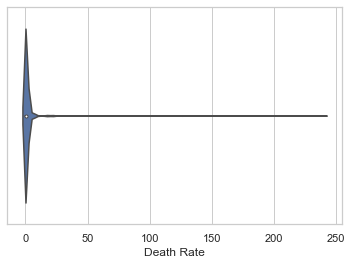

0.094199    380
0.003925     82
0.011775     75
0.054949     42
0.007850     39
           ... 
0.575551      1
0.290096      1
0.228786      1
0.148913      1
0.375000      1
Name: Death Rate, Length: 3969, dtype: int64

In [177]:
#checking the Death Rate column

sns.set(style='whitegrid')
sns.violinplot(DS['Death Rate'])
plt.show()

DS['Death Rate'].value_counts()

Observation:
    
    Our data is widely spread from 0 to 240.

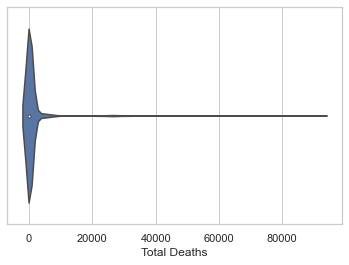

24.0       1269
1.0         490
3.0         255
2.0         213
10.0        182
           ... 
23190.0       1
2669.0        1
633.0         1
719.0         1
6028.0        1
Name: Total Deaths, Length: 1185, dtype: int64

In [178]:
#checking the Total Deaths column

sns.set(style='whitegrid')
sns.violinplot(DS['Total Deaths'])
plt.show()

DS['Total Deaths'].value_counts()

Observation:
    
    Our data is widely spread from 0 to 88000.

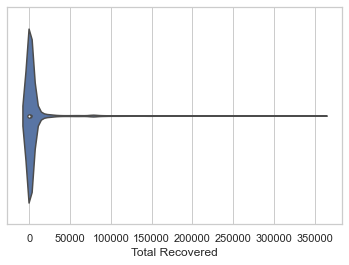

219.0       295
6.0         140
8.0         111
7.0         105
2.0          98
           ... 
80475.0       1
2655.0        1
104030.0      1
6327.0        1
5568.0        1
Name: Total Recovered, Length: 2268, dtype: int64

In [179]:
#checking the Total Recovered column

sns.set(style='whitegrid')
sns.violinplot(ds['Total Recovered'])
plt.show()

DS['Total Recovered'].value_counts()

Observation:
    
    Our data is widely spread from 0 to 38000

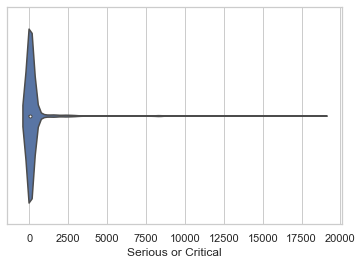

13.0       2526
1.0         619
4.0         284
2.0         278
3.0         196
5.0         147
7.0         139
10.0        114
6.0          93
8.0          91
17.0         66
22.0         53
61.0         42
9.0          41
15.0         38
21.0         38
55.0         37
31.0         36
72.0         35
160.0        32
1559.0       31
92.0         31
18.0         30
378.0        29
11.0         29
8318.0       28
36.0         27
14.0         26
111.0        26
2300.0       26
37.0         25
23.0         24
12.0         23
20.0         22
19.0         22
40.0         22
43.0         22
41.0         20
27.0         20
45.0         19
144.0        18
16.0         17
28.0         17
557.0        17
502.0        15
49.0         14
33.0         14
46.0         13
32.0         12
237.0        12
50.0         12
24.0         12
44.0         11
85.0         11
123.0        11
127.0        10
212.0        10
30.0         10
98.0         10
51.0          9
34.0          9
77.0          8
141.0   

In [180]:
#checking the Srious or Critical column

sns.set(style='whitegrid')
sns.violinplot(DS['Serious or Critical'])
plt.show()

DS['Serious or Critical'].value_counts()

Observation:
    
    Our data is widely spread from 1 to 19000.

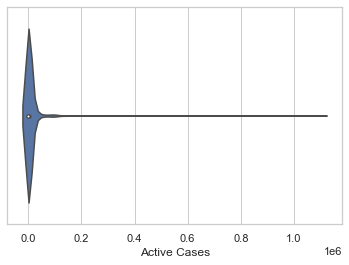

0.0       244
1.0       185
2.0       125
6.0       111
3.0       110
         ... 
5663.0      1
7992.0      1
4428.0      1
1274.0      1
621.0       1
Name: Active Cases, Length: 2680, dtype: int64

In [181]:
#checking the Srious or Active Cases column

sns.set(style='whitegrid')
sns.violinplot(DS['Active Cases'])
plt.show()

DS['Active Cases'].value_counts()

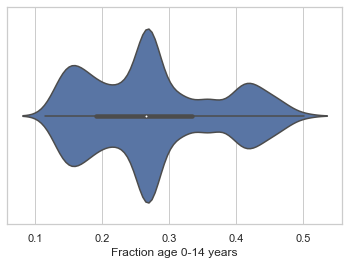

0.2665    1147
0.2740     155
0.1640      93
0.1540      93
0.1650      93
0.2500      62
0.1480      62
0.3590      62
0.1470      62
0.4480      62
0.4270      62
0.2110      62
0.2840      62
0.3990      62
0.3160      62
0.1410      62
0.1500      62
0.3720      62
0.1810      62
0.4180      62
0.4230      62
0.1770      62
0.4770      62
0.1420      62
0.1350      62
0.2310      62
0.2790      62
0.4320      62
0.3140      62
0.2900      62
0.1390      62
0.1890      62
0.2930      62
0.4400      62
0.2400      62
0.3850      31
0.4060      31
0.3510      31
0.3110      31
0.1670      31
0.1610      31
0.4210      31
0.2780      31
0.1780      31
0.3180      31
0.4080      31
0.4070      31
0.1290      31
0.2130      31
0.3350      31
0.1900      31
0.2180      31
0.2030      31
0.4120      31
0.2800      31
0.5020      31
0.1870      31
0.3540      31
0.1750      31
0.2000      31
0.4170      31
0.2430      31
0.2640      31
0.2330      31
0.2160      31
0.3090      31
0.2350    

In [182]:
#checking the Srious or Fraction age 0-14 years column

sns.set(style='whitegrid')
sns.violinplot(DS['Fraction age 0-14 years'])
plt.show()

DS['Fraction age 0-14 years'].value_counts()

Observation:
    
    Maximum kids fall in the fraction age range of 0.2 to 0.34

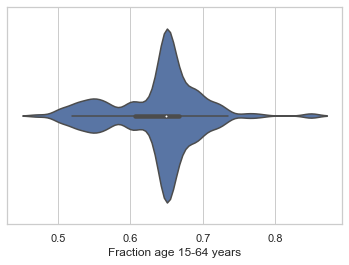

0.6490    1240
0.6550     155
0.6920     124
0.6470     124
0.6620     124
0.5410      93
0.6890      93
0.6370      93
0.6600      93
0.6570      93
0.5460      93
0.6430      93
0.5560      62
0.6930      62
0.6220      62
0.6030      62
0.6800      62
0.6580      62
0.6540      62
0.6670      62
0.6690      62
0.6840      62
0.5690      62
0.6560      62
0.6420      62
0.7070      62
0.6590      62
0.6010      62
0.6980      62
0.6860      62
0.6380      62
0.6070      62
0.5240      62
0.6740      62
0.6350      62
0.6450      62
0.6440      62
0.6710      62
0.6480      62
0.6650      62
0.5080      62
0.5330      31
0.5200      31
0.5310      31
0.7140      31
0.5980      31
0.6510      31
0.7580      31
0.6170      31
0.4720      31
0.5430      31
0.7150      31
0.5490      31
0.6500      31
0.6940      31
0.6850      31
0.5270      31
0.7340      31
0.6240      31
0.5640      31
0.6820      31
0.6040      31
0.5730      31
0.6750      31
0.5540      31
0.7250      31
0.5070    

In [183]:
#checking the Srious or Fraction age 15-64 years column

sns.set(style='whitegrid')
sns.violinplot(DS['Fraction age 15-64 years'])
plt.show()

DS['Fraction age 15-64 years'].value_counts()

Observation:
    
    Maximum people in the country fall in the Fraction age range of 0.61 to 0.68 

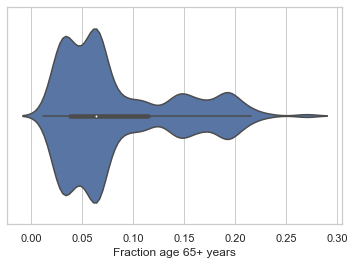

0.0635    1147
0.0300     217
0.0320     155
0.0450     155
0.0250     124
0.0310     124
0.0240     124
0.0280     124
0.0530      93
0.0260      93
0.0340      93
0.0290      93
0.1970      93
0.0360      93
0.0350      93
0.0690      93
0.0600      62
0.1090      62
0.1900      62
0.0400      62
0.0720      62
0.0440      62
0.0860      62
0.0480      62
0.0270      62
0.1940      62
0.0230      62
0.0380      62
0.1860      62
0.0540      62
0.0620      62
0.1390      62
0.0390      62
0.2150      62
0.1470      62
0.0970      62
0.0470      62
0.1680      62
0.1120      62
0.0700      62
0.1480      62
0.0410      31
0.0640      31
0.1440      31
0.0950      31
0.0730      31
0.0830      31
0.2040      31
0.1950      31
0.1880      31
0.0330      31
0.0790      31
0.1540      31
0.2700      31
0.0460      31
0.1140      31
0.1630      31
0.0520      31
0.2120      31
0.0570      31
0.1850      31
0.0220      31
0.1510      31
0.0510      31
0.1920      31
0.2080      31
0.1110    

In [184]:
#checking the Srious or Fraction age 65+ years column

sns.set(style='whitegrid')
sns.violinplot(DS['Fraction age 65+ years'])
plt.show()

DS['Fraction age 65+ years'].value_counts()

Obsevration:
    
    Maximum senio citizens fall in the fraction age range of 0.04 to 0.12

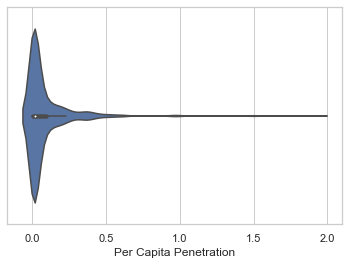

0.019380    31
0.020017    31
0.001102    31
0.006312    31
0.001008    31
            ..
0.021383     1
0.009509     1
0.010855     1
0.016567     1
0.010225     1
Name: Per Capita Penetration, Length: 4455, dtype: int64

In [185]:
#checking the Srious or Per Capita Penetration column

sns.set(style='whitegrid')
sns.violinplot(DS['Per Capita Penetration'])
plt.show()

DS['Per Capita Penetration'].value_counts()

Observation:
    
    Maximum Per Capita Penetration falls in the range of 0 to 0.2

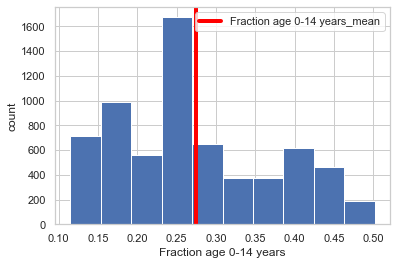

In [186]:
#checking the mean of Fraction age 0-14 years

red_shift = DS['Fraction age 0-14 years'].hist()
mean_val = np.mean(DS['Fraction age 0-14 years'])
plt.axvline(mean_val,linewidth=4, color='red', label='Fraction age 0-14 years_mean')
plt.xlabel('Fraction age 0-14 years')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    Mean of Fraction age 0-14 years is 0.30

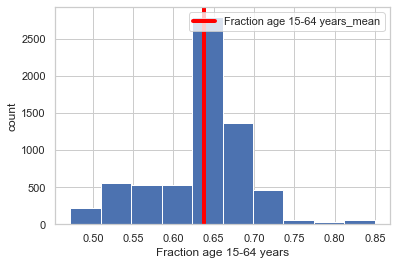

In [187]:
#checking the mean of Fraction age 15-64 years

red_shift = DS['Fraction age 15-64 years'].hist()
mean_val = np.mean(DS['Fraction age 15-64 years'])
plt.axvline(mean_val,linewidth=4, color='red', label='Fraction age 15-64 years_mean')
plt.xlabel('Fraction age 15-64 years')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    Mean of Fraction age 15-64 years is 0.67

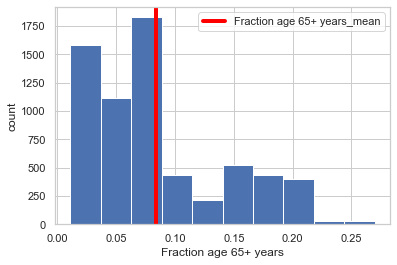

In [188]:
#checking the mean of Fraction age 65+ years

red_shift = DS['Fraction age 65+ years'].hist()
mean_val = np.mean(DS['Fraction age 65+ years'])
plt.axvline(mean_val,linewidth=4, color='red', label='Fraction age 65+ years_mean')
plt.xlabel('Fraction age 65+ years')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    Mean of Fraction age 65+ years is 0.9

# Bivaraite Analysis

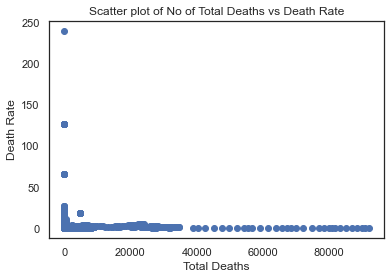

In [189]:
#Exploring Total Deaths vs Death Rate via Scatter plot

sns.set(style='white')
plt.scatter(DS['Total Deaths'],DS['Death Rate'])
plt.xlabel('Total Deaths')
plt.ylabel('Death Rate')
plt.title("Scatter plot of No of Total Deaths vs Death Rate")
plt.show()

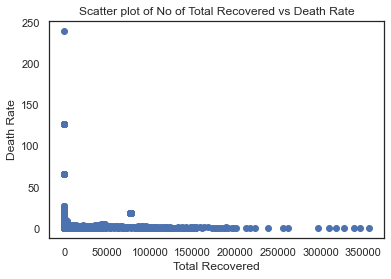

In [190]:
#Exploring Total Recovered vs Death Rate via Scatter plot

sns.set(style='white')
plt.scatter(DS['Total Recovered'],DS['Death Rate'])
plt.xlabel('Total Recovered')
plt.ylabel('Death Rate')
plt.title("Scatter plot of No of Total Recovered vs Death Rate")
plt.show()

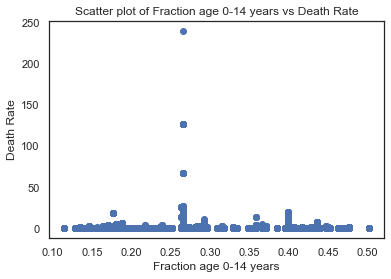

In [191]:
#Exploring Total Fraction age 0-14 years vs Death Rate via Scatter plot

sns.set(style='white')
plt.scatter(DS['Fraction age 0-14 years'],DS['Death Rate'])
plt.xlabel('Fraction age 0-14 years')
plt.ylabel('Death Rate')
plt.title("Scatter plot of Fraction age 0-14 years vs Death Rate")
plt.show()

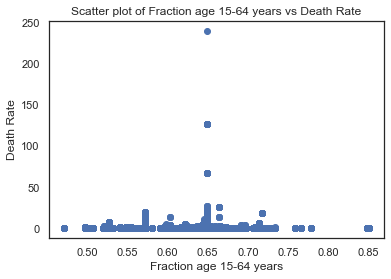

In [192]:
#Exploring Total Fraction age 15-64 years vs Death Rate via Scatter plot

sns.set(style='white')
plt.scatter(DS['Fraction age 15-64 years'],DS['Death Rate'])
plt.xlabel('Fraction age 15-64 years')
plt.ylabel('Death Rate')
plt.title("Scatter plot of Fraction age 15-64 years vs Death Rate")
plt.show()

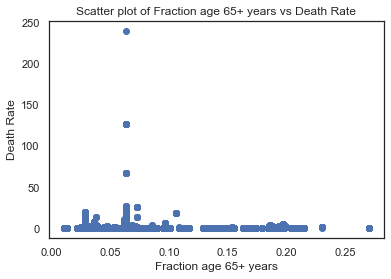

In [193]:
#Exploring Total Fraction age 65+ years vs Death Rate via Scatter plot

sns.set(style='white')
plt.scatter(DS['Fraction age 65+ years'],DS['Death Rate'])
plt.xlabel('Fraction age 65+ years')
plt.ylabel('Death Rate')
plt.title("Scatter plot of Fraction age 65+ years vs Death Rate")
plt.show()

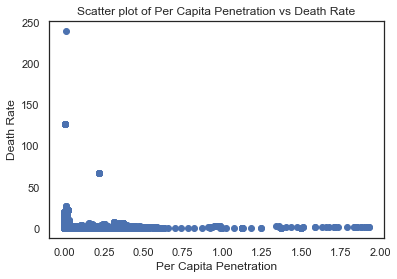

In [194]:
#Exploring Per Capita Penetration vs Death Rate via Scatter plot

sns.set(style='white')
plt.scatter(DS['Per Capita Penetration'],DS['Death Rate'])
plt.xlabel('Per Capita Penetration')
plt.ylabel('Death Rate')
plt.title("Scatter plot of Per Capita Penetration vs Death Rate")
plt.show()

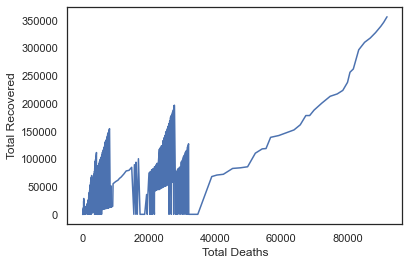

In [195]:
sns.lineplot(x=DS["Total Deaths"],y=DS["Total Recovered"],data=DS)
plt.show()

# Multivariate Analysis

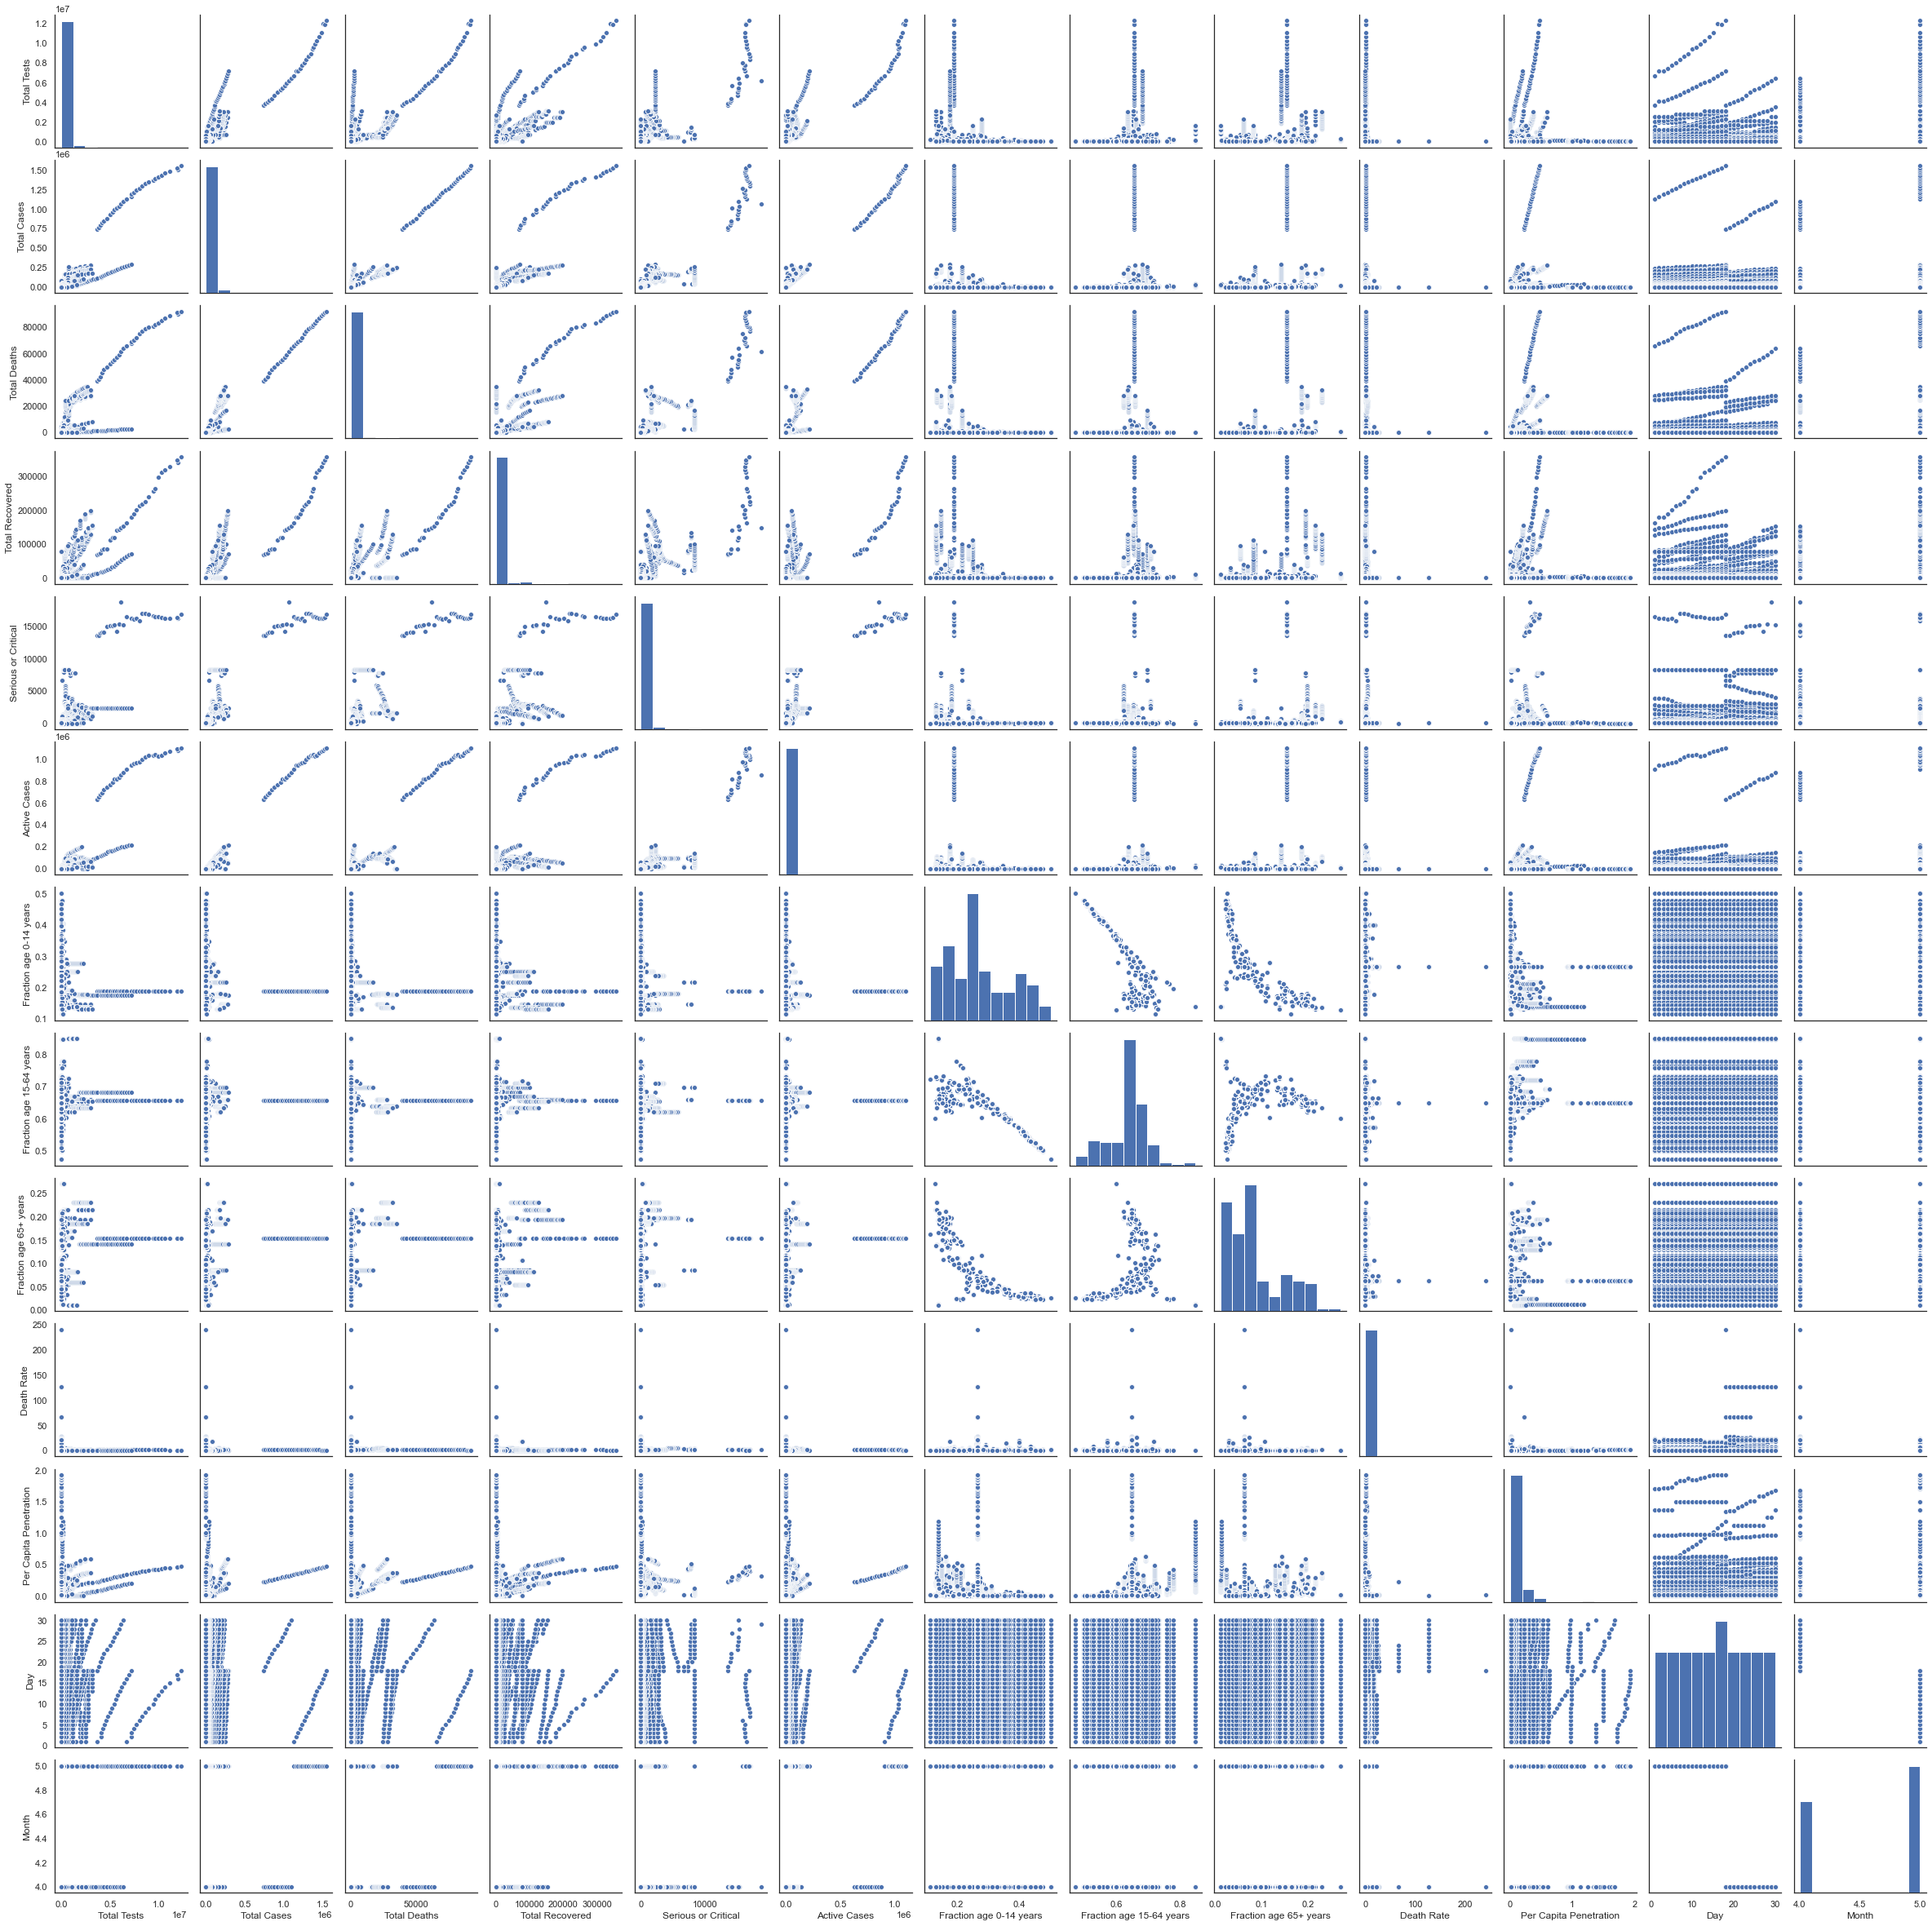

In [196]:
sns.pairplot(DS)

# Encoding the categorical columns

In [197]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
DS['Country']=le.fit_transform(DS['Country'].astype(str))

In [198]:
DS.head()

,Country,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death Rate,Per Capita Penetration,Day,Month
0,201,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,1.048159,0.223352,18,4
1,201,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,1.050174,0.230922,19,4
2,201,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,1.055892,0.239667,20,4
3,201,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,1.082249,0.247523,21,4
4,201,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,1.101855,0.256585,22,4


# Handling outliers

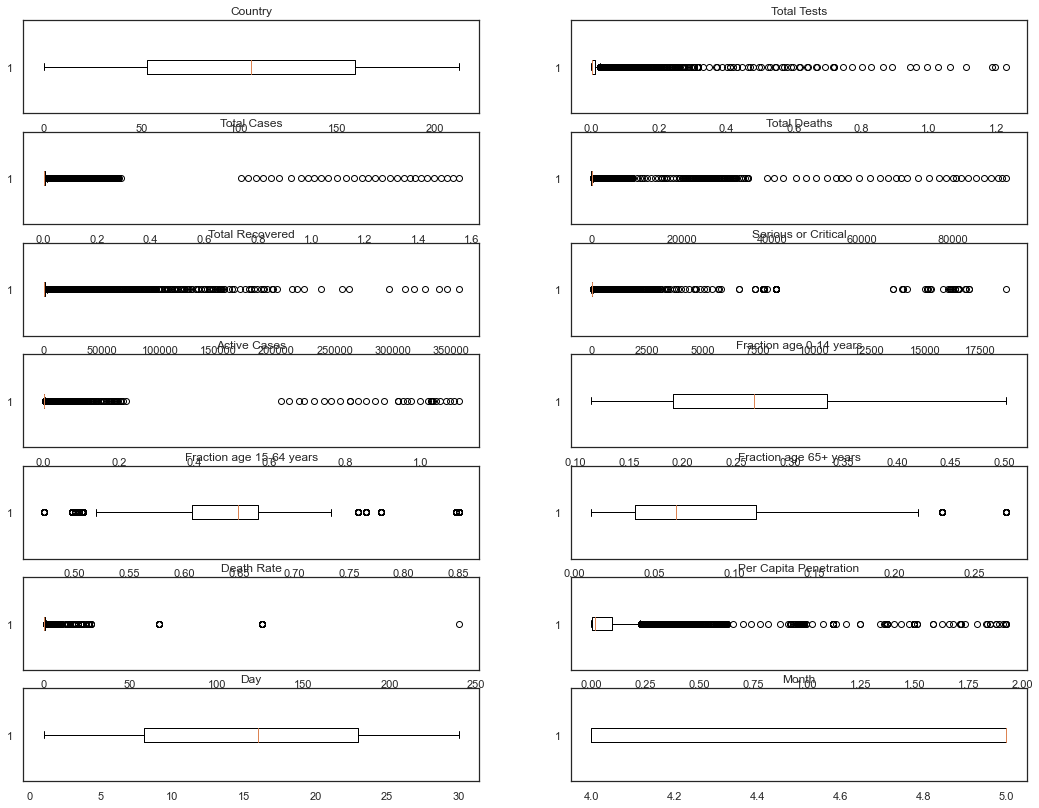

In [199]:
plt.figure(figsize=(18,14))

for i in range(len(DS.columns)):
        plt.subplot(7,2,i+1)
        plt.boxplot(DS[DS.columns[i]], vert=False)
        plt.title(DS.columns[i])
plt.show()

Observation:
    
    We can see that there are outliers present in our dataset.

In [200]:
from scipy.stats import zscore
z_score=abs(zscore(DS))
print(DS.shape)
DS_final=DS.loc[(z_score<3).all(axis=1)]
print(DS_final.shape)

(6603, 14)
(6082, 14)


In [201]:
DS=DS_final
print(DS.shape)

(6082, 14)


# Handling Skewness

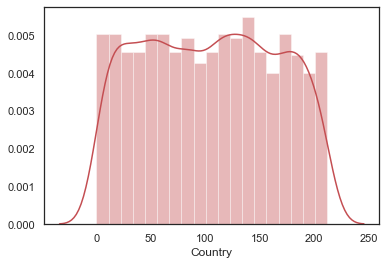

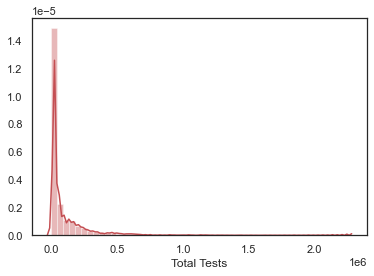

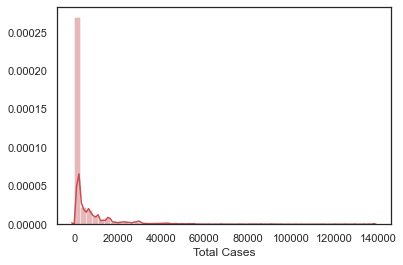

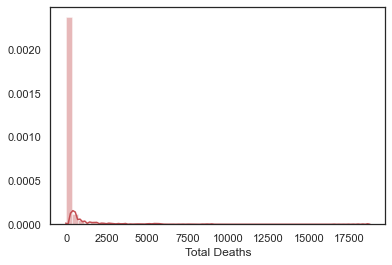

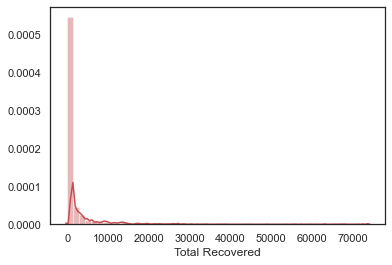

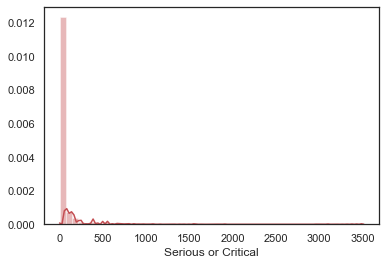

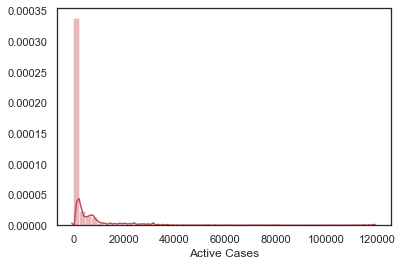

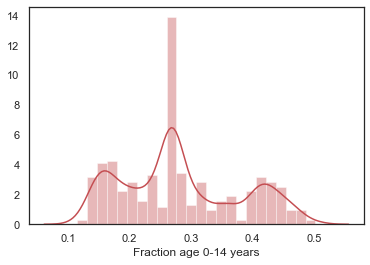

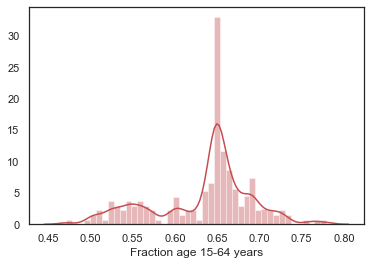

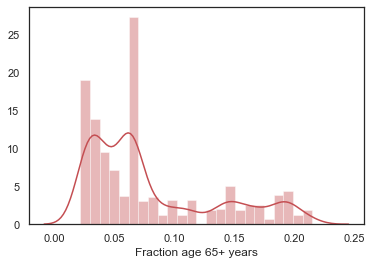

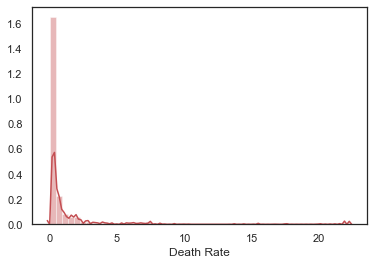

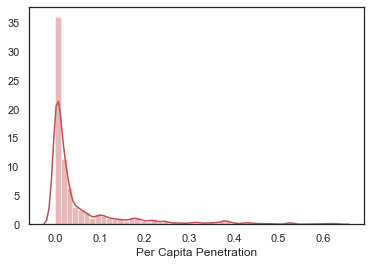

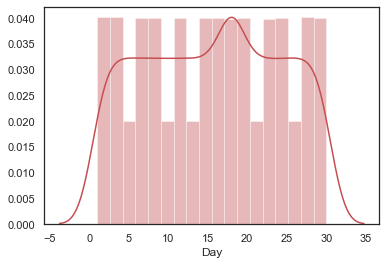

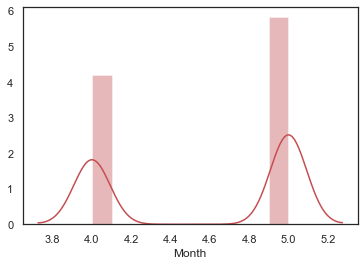

In [202]:
for col in DS.describe().columns:
    sns.distplot(DS[col],color='r')
    plt.show()

In [203]:
DS.skew()

Country                     0.021378
Total Tests                 5.105525
Total Cases                 5.075866
Total Deaths                8.555729
Total Recovered             6.929814
Serious or Critical         9.575596
Active Cases                5.969213
Fraction age 0-14 years     0.374146
Fraction age 15-64 years   -0.608902
Fraction age 65+ years      1.028619
Death Rate                  6.282446
Per Capita Penetration      2.599752
Day                        -0.026876
Month                      -0.327294
dtype: float64

In [204]:
#Removing skewness via log method

for col in DS.columns:
    if DS.skew().loc[col]>0.55:
        DS[col]=np.log1p(DS[col])

In [205]:
DS.skew()

Country                     0.021378
Total Tests                -0.489024
Total Cases                 0.008302
Total Deaths                0.739350
Total Recovered             0.155997
Serious or Critical         0.950745
Active Cases               -0.070348
Fraction age 0-14 years     0.374146
Fraction age 15-64 years   -0.608902
Fraction age 65+ years      0.975649
Death Rate                  2.634141
Per Capita Penetration      2.328828
Day                        -0.026876
Month                      -0.327294
dtype: float64

In [206]:
DS.isnull().sum()

Country                     0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
Death Rate                  0
Per Capita Penetration      0
Day                         0
Month                       0
dtype: int64

# Model Training

In [207]:
DS.head()

,Country,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Death Rate,Per Capita Penetration,Day,Month
31,158,14.420860,10.513090,5.749393,8.025516,2.197225,10.417029,0.176,0.682,0.132781,0.016942,0.024901,18,4
32,158,14.478199,10.665554,5.891644,8.099251,2.197225,10.576483,0.176,0.682,0.132781,0.018437,0.028943,19,4
33,158,14.534969,10.760495,6.006353,8.145260,6.552508,10.675238,0.176,0.682,0.132781,0.019532,0.031780,20,4
34,158,14.577533,10.873584,6.124683,8.262043,6.552508,10.787978,0.176,0.682,0.132781,0.021059,0.035519,21,4
35,158,14.626441,10.968198,6.242223,8.394121,6.552508,10.879311,0.176,0.682,0.132781,0.022544,0.038976,22,4


In [209]:
x=DS.drop(columns=['Death Rate'],axis=1)

In [210]:
y=DS['Death Rate']

In [211]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(6082, 13) 		 (6082,)


In [212]:
#scaling input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# We have observed Multicollinearity in columns so we will apply PCA

In [213]:
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
xpca=pca.fit_transform(x)
x=xpca

In [214]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8
0,3.626241,-0.220242,1.165315,1.087964,-1.624390,0.856768,-0.559557,-0.098340,-0.162585
1,3.726899,-0.218567,1.259194,1.070141,-1.604233,0.900541,-0.558472,-0.108734,-0.221929
2,4.741075,0.121947,1.746125,1.199845,-0.264683,-1.097860,0.432447,0.332864,1.093402
3,4.829027,0.116834,1.834491,1.182720,-0.244723,-1.054649,0.434592,0.330858,1.034144
4,4.914030,0.110423,1.921547,1.167172,-0.226805,-1.013592,0.436708,0.337120,0.971722
...,...,...,...,...,...,...,...,...,...
6077,-2.352436,-0.741381,-1.169663,1.471261,0.463182,-1.085976,0.116138,1.497651,-0.559697
6078,-2.354193,-0.778634,-1.096423,1.468425,0.465117,-1.074859,0.115489,1.508078,-0.581411
6079,-2.355950,-0.815887,-1.023182,1.465589,0.467051,-1.063743,0.114840,1.518506,-0.603125
6080,-2.357707,-0.853140,-0.949942,1.462752,0.468985,-1.052626,0.114191,1.528934,-0.624839


In [216]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 20 is 0.711783322506696


In [217]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [218]:
#Importing all model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error metrics
from sklearn.model_selection import GridSearchCV,cross_val_score

In [219]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('********************************************************************************************')
    print('\n')

score of LinearRegression() is: 0.6894320414683734
Error:
Mean absolute error: 0.21275124524701308
Mean squared error: 0.08842916370037668
Root Mean Squared Error: 0.2973704149715917
r2_score: 0.711783322506696
********************************************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 0.022629350015723956
Mean squared error: 0.008669336553941913
Root Mean Squared Error: 0.093109272115842
r2_score: 0.97174407997214
********************************************************************************************


score of KNeighborsRegressor() is: 0.9890129601714102
Error:
Mean absolute error: 0.020313223970281603
Mean squared error: 0.004640456703087361
Root Mean Squared Error: 0.0681208976973099
r2_score: 0.9848753854831528
********************************************************************************************


score of SVR() is: 0.9816929836694087
Error:
Mean absolute error: 0.0576495689301127
M

In [220]:
#Cross validating all algorithms by using for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print("Mean score:",score.mean())
    print("Standard deviation:",score.std())
    print('****************************************************************************************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [ 0.75354645  0.6371902   0.1180636   0.37529876  0.06612626 -0.6304675
  0.3410968   0.64491783  0.74142602  0.54461074]
Mean score: 0.3591809165412624
Standard deviation: 0.4023635006318995
****************************************************************************************************************************************************


Model: DecisionTreeRegressor()
Score: [-0.95661472  0.52782649  0.12713041  0.67046834  0.46418305  0.15334432
  0.49813664  0.58398763  0.51357631  0.32719142]
Mean score: 0.2909229881396968
Standard deviation: 0.44855518142562606
****************************************************************************************************************************************************


Model: KNeighborsRegressor()
Score: [-0.11276891  0.15290669  0.31557991  0.47613337  0.27012434  0.70294328
  0.53672898  0.62619982  0.58795709  0.32896435]
Mean score: 0.3884768898575794
Standard deviation: 0.23546968003153235
***********

# SVR() model gives us best score and r2 score without overfitting and underfitting so choose it as our final model

In [221]:
#Using GridSearchCV to find the best paarameters in SVR()

from sklearn.model_selection import GridSearchCV

parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,5,10],'degree':[3,8],'coef0':[0.01,10,0.5],'gamma':('auto','scale')}
sv=SVR()

clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'coef0': 0.01, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


In [224]:
#using SVR with its best parameters

svr=SVR(kernel='rbf',C=10,degree=3,coef0=0.01,gamma='scale')
svr.fit(x_train,y_train)
print('Score:',svr.score(x_train,y_train))
y_pred=svr.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.9866050516186019


Mean absolute error: 0.05173340987156894
Mean squared error: 0.0037089276578268176
Root Mean Squared error: 0.06090096598434887


r2_score: 0.9879115128779928




In [228]:
#Cross validating SVR

score=cross_val_score(svr,x,y,cv=5,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.51785111 0.83250703 0.83640959 0.92163366 0.81002664]
Mean Score: 0.7836856058313539
Standard deviation: 0.13824242629056205


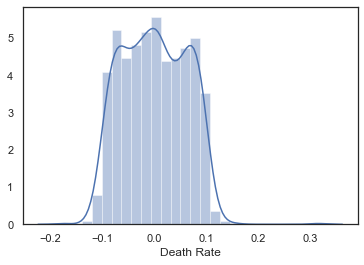

In [229]:
#plotting the distribution plot and we find the Gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

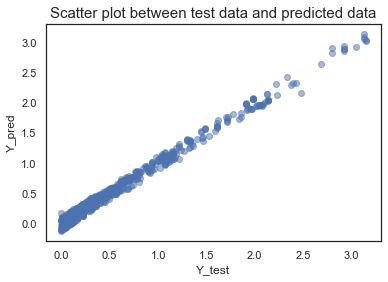

In [230]:
#Scatter plot between test data and prediction

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [231]:
#saving our model

import joblib
joblib.dump(svr,'svr_CountryWiseCovid19.csv')

['svr_CountryWiseCovid19.csv']

In [232]:
model=joblib.load('svr_CountryWiseCovid19.csv')

In [234]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[ 3.63719683e-02  3.40900509e-01  2.19314085e-02  1.19961929e-01
  1.07415138e-01  1.03787657e-01  2.19877257e-01  8.30824604e-02
 -7.18686612e-02  1.09456637e+00  2.38918572e-01  2.30863080e-01
  3.56374052e-01  3.89444098e-01  3.40614391e-01  1.39631697e+00
  2.42075812e-01  1.78222215e-02  5.64126470e-02  4.23475265e-01
 -5.05306784e-03  8.75949686e-02  1.58500002e+00  7.43045312e-02
  3.78097966e-01  2.07860369e-01  8.58370665e-02  1.06410289e+00
  1.07157701e+00  1.24781363e-01  6.77641355e-02  2.31764170e-01
  7.24408733e-02  2.15958193e-02  1.42537359e-01  2.34682933e-01
  6.11179681e-01  6.77177646e-02  1.10841749e-02  6.64531431e-01
  2.42385764e+00  1.45871054e+00  1.97129970e+00  1.37359043e-01
 -6.50502989e-03  6.40124085e-01  8.69673214e-01  1.27375132e+00
  1.02247682e+00  6.97934184e-02  2.94108442e-01  7.53207182e-02
  2.60927756e-01  4.99084450e-01 -6.27793104e-02  4.52919337e-01
  9.84102152e-01 -2.46958097e-02 -5.80469084e-02  2.51188891e-01
  4.25267286e-01  5.62443